In [12]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

%matplotlib inline

In [112]:
datos = pd.read_excel('limpiadores_datos.xlsx')
# Hacer que los valores de las siguientes columnas tengan solo la primera letra en mayusculas
datos["i_interaccion"] = datos["i_interaccion"].str.title()
datos["pose"] = datos["pose"].str.title()
datos["rechaza"] = datos["rechaza"].str.title()
datos["sacudida"] = datos["sacudida"].str.title()
datos["persigue"] = datos["persigue"].str.title()
datos["huye"] = datos["huye"].str.title()

datos[:5]

sp_limp  num_limp          sp_cliente  tam_cliente  \
0  Thalassoma lucasanum         1   Cromis atrilobata            4   
1  Thalassoma lucasanum         1   Cromis atrilobata            4   
2  Thalassoma lucasanum         2   Cromis atrilobata            4   
3  Thalassoma lucasanum         1  Holocanthus passer           10   
4  Thalassoma lucasanum         2   Cromis atrilobata            4   

  i_interaccion         pose rechaza sacudida persigue huye  
0       Cliente  Hacia Abajo      No       No        -    -  
1     Limpiador            -       -        -        -    -  
2       Cliente  Hacia Abajo      No       No        -    -  
3     Limpiador            -       -       Si       No   No  
4       Cliente  Hacia Abajo      No       No        -    -

In [71]:
# 3 o mas
#tresomas = datos[datos["num_limp"] >= 3].groupby("sp_limp")["num_limp"].value_counts(bins=1)

# TODO: Como agrupar datos mayores a 3 en una sola categoria de conteo?
limps = datos.groupby("sp_limp")
limps["num_limp"].value_counts()

sp_limp                     num_limp
Bodianus diplotaenia        1           120
                            2             8
Johnrandallia nigrirostris  1            18
                            2             4
                            3             1
Thalassoma lucasanum        1            46
                            2            21
                            3             2
                            5             1
Name: num_limp, dtype: int64

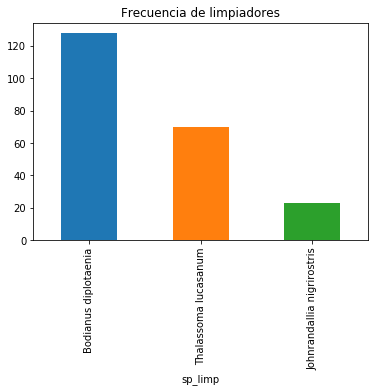

In [105]:
# Numero de limpiadores por especie
frec_limp = limps["sp_limp"].count().sort_values(ascending=False)
frec_limp.plot.bar()
plt.title("Frecuencia de limpiadores")
#plt.tight_layout()
plt.savefig("Graficas/frec_limp.png", dpi=200, bbox_inches = "tight")

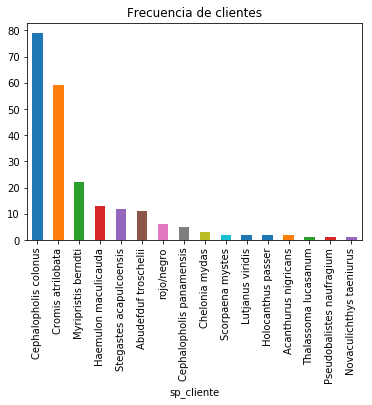

In [106]:
# Numero de clientes por especie
clientes = datos.groupby("sp_cliente")
frec_clientes = clientes["sp_limp"].count().sort_values(ascending=False)
frec_clientes.plot.bar()
plt.title("Frecuencia de clientes")
plt.savefig("Graficas/frec_clie.png", dpi=200, bbox_inches = "tight")

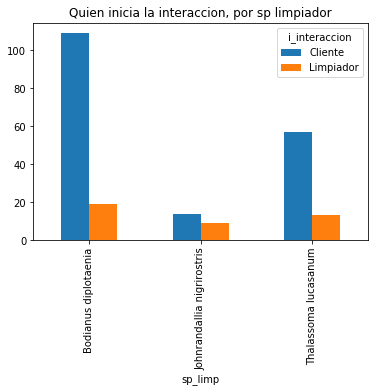

In [107]:
# Quienes inician la interaccion, segun la especie del limpiador
limps["i_interaccion"].value_counts().unstack().plot.bar()
plt.title("Quien inicia la interaccion, por sp limpiador")
plt.savefig("Graficas/inicia_inter.png", dpi=200, bbox_inches = "tight")

In [117]:
# Cuando el cliente inicia, cuantas veces cada limpiador lo rechaza
clie_inicia = datos[datos["i_interaccion"] == "Cliente"]
rechazos = clie_inicia.groupby("sp_limp")["rechaza"].value_counts()
rechazos

sp_limp                     rechaza
Bodianus diplotaenia        No         65
                            Si         44
Johnrandallia nigrirostris  No         14
Thalassoma lucasanum        No         41
                            Si         12
                            -           4
Name: rechaza, dtype: int64

In [108]:
# Existen interacciones iniciadas por el limpiador donde haya rechazo?
datos[datos["i_interaccion"].str.lower() == "limpiador"]["rechaza"].value_counts()

-    41
Name: rechaza, dtype: int64

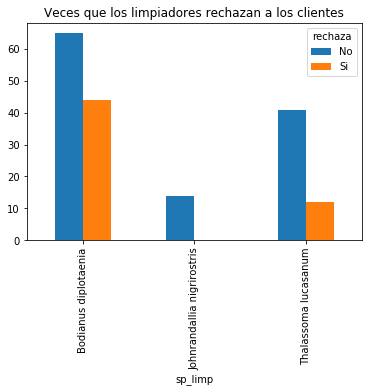

In [127]:
# Numero de veces que cada especie de limpiador rechaza una oferta de limpieza
rechazos.unstack()[["No", "Si"]].plot.bar()
plt.title("Veces que los limpiadores rechazan a los clientes")
plt.savefig("Graficas/num_rechazos.png", dpi=200, bbox_inches = "tight")

In [233]:
def comp_segun_limp(nombre_limp):    
    # Grafica Bodianus diplotaenia
    filtra_sacude = datos[datos["sacudida"] != "-"]
    un_limp = filtra_sacude[filtra_sacude["sp_limp"] == nombre_limp]

    # Filtra por separado cuando el cliente se sacude, persigue, huye o las tres cosas
    no_sacude = un_limp[un_limp["sacudida"] == "No"]
    sacude = un_limp[un_limp["sacudida"] == "Si"]

    # Cuenta las ocurrencias, separadas por quien inicio la interaccion
    cuenta_func = lambda df: df.groupby("i_interaccion")["sacudida"].count()

    count_nosac = cuenta_func(no_sacude)
    count_sac = cuenta_func(sacude)

    # Construye DataFrame a partir de las cuentas
    comport = pd.DataFrame({
        "No Sacude": count_nosac,
        "Sacude": count_sac,
     })

    # Si no hay datos, poner ceros
    comport.fillna(0, inplace=True)
    # Voltear el dataframe para que queden los comportamientos en el eje X
    comport.transpose().plot.bar()

    plt.title("Comportamientos de los clientes de {}".format(nombre_limp))
    plt.yticks([x for x in range(0, 70, 10)])
    plt.savefig("Graficas/comport_{}.png".format(nombre_limp.split()[0]), dpi=200, bbox_inches = "tight")

In [219]:
def sacudidas_segun_limp(nombre_limp):
    # Grafica Bodianus diplotaenia
    un_limp = datos[datos["sp_limp"] == nombre_limp]

    # Filtra por separado cuando el cliente se sacude, persigue, huye o las tres cosas
    no_sacude = un_limp[un_limp["sacudida"] == "No"]
    sacude = un_limp[(un_limp["sacudida"] == "Si") & (un_limp["persigue"] == "No") & (un_limp["huye"] == "No")]
    persigue = un_limp[un_limp["persigue"] == "Si"]
    huye = un_limp[un_limp["huye"] == "Si"]
    todo = un_limp[(un_limp["sacudida"] == "Si") & (un_limp["persigue"] == "Si") & (un_limp["huye"] == "Si")]

    # Cuenta las ocurrencias, separadas por quien inicio la interaccion
    cuenta_func = lambda df: df.groupby("i_interaccion")["sacudida"].count()

    count_nosac = cuenta_func(no_sacude)
    count_sac = cuenta_func(sacude)
    count_pers = cuenta_func(persigue)
    count_huye = cuenta_func(huye)
    count_todo = cuenta_func(todo)

    # Construye DataFrame a partir de las cuentas
    comport = pd.DataFrame({
        #"No Sacude": count_nosac,
        "Solo Sacude": count_sac,
        "Persigue": count_pers,
        "Huye": count_huye,
        "Todo": count_todo
     })

    # Si no hay datos, poner ceros
    comport.fillna(0, inplace=True)
    # Voltear el dataframe para que queden los comportamientos en el eje X
    comport.transpose().plot.bar()

    plt.title("Detalle comp. sacudida de los clientes de {}".format(nombre_limp))
    plt.yticks([x for x in range(8)])
    plt.savefig("Graficas/sacudidas_{}.png".format(nombre_limp.split()[0]), dpi=200, bbox_inches = "tight")

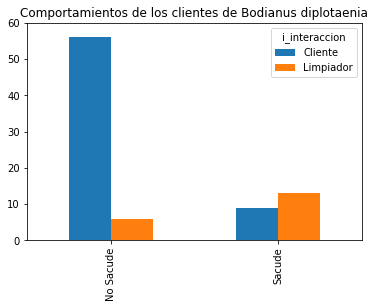

In [234]:
comp_segun_limp("Bodianus diplotaenia")

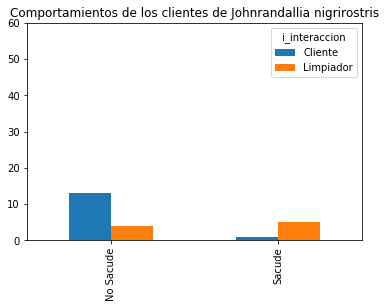

In [235]:
comp_segun_limp("Johnrandallia nigrirostris")

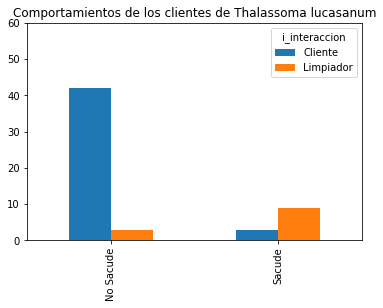

In [236]:
comp_segun_limp("Thalassoma lucasanum")

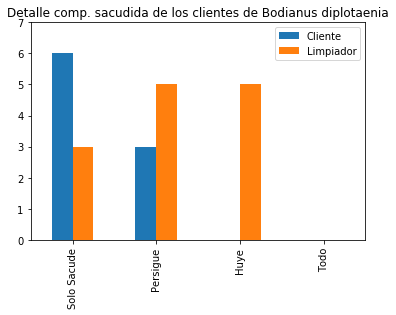

In [223]:
sacudidas_segun_limp("Bodianus diplotaenia")

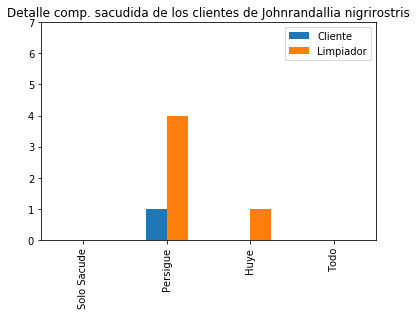

In [224]:
sacudidas_segun_limp("Johnrandallia nigrirostris")

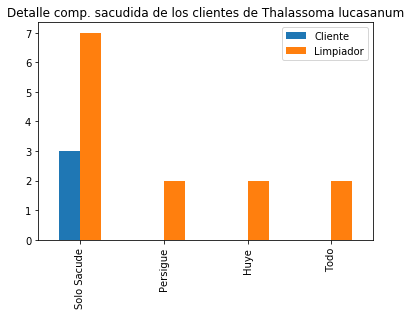

In [225]:
sacudidas_segun_limp("Thalassoma lucasanum")